# Opret Word dokumenter med Python
### Brug Python til at automatisere oprettelsen af dine Word dokumenter





## docx
python-docx er et Python-bibliotek til oprettelse og opdatering af Microsoft Word (.docx) filer.

https://python-docx.readthedocs.io/en/latest/

In [7]:
# Install
#!pip install docx
#!pip install docxtpl

!pip install python-docx

In [8]:
# Import
from docx.shared import Cm
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Cm, Inches, Mm, Emu
import random
import datetime
import matplotlib.pyplot as plt

# Opret template

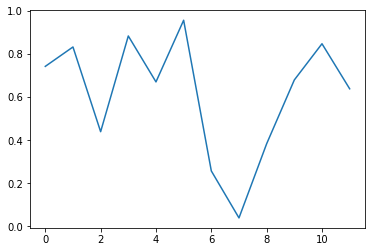

In [9]:
#Import template document
template = DocxTemplate('report_template.dotx')

#Generate list of random values
table_contents = []
x = []
y = []

for i in range(0,12):
    number = round(random.random(),3)
    
    table_contents.append({
        'Index': i,
        'Value': number
        })
    
    x.append(i)
    y.append(number)

#Plot random values and save figure
fig = plt.figure()
plt.plot(x, y)
fig.savefig('image.png', dpi=fig.dpi)

#Import saved figure
image = InlineImage(template,'image.png',Cm(10))

In [10]:
#Declare template variables
context = {
    'title': 'Automated Report',
    'day': datetime.datetime.now().strftime('%d'),
    'month': datetime.datetime.now().strftime('%b'),
    'year': datetime.datetime.now().strftime('%Y'),
    'table_contents': table_contents,
    'image': image
    }

#Render automated report
template.render(context)
template.save('generated_report.docx')